# 手动实现

In [1]:
import numpy as np

np.set_printoptions(suppress=True, threshold=np.inf,precision=2)

# 度量距离
def minkowski_distance(x,y,p=2):
    """
    闵氏距离
    当p=1时，就是曼哈顿距离；当p=2时，就是欧氏距离；当p→∞时，就是切比雪夫距离
    """
    return np.linalg.norm(x-y,ord=p)
def cosine_distance(vec1, vec2):
    """
    夹角余弦
    """
    vec1_norm = np.linalg.norm(vec1)
    vec2_norm = np.linalg.norm(vec2)
    return vec1.dot(vec2) / (vec1_norm * vec2_norm)
def euclidean_distance(vec1, vec2):
    """
    欧氏距离
    """
    return np.linalg.norm(vec1 - vec2, ord=2)
def manhattan_distance(vec1, vec2):
    """
    曼哈顿距离
    """
    return np.linalg.norm(vec1 - vec2, ord=1)
def chebyshev_distance(vec1, vec2):
    """
    切比雪夫距离
    """
    return np.linalg.norm(vec1 - vec2, ord=np.inf)
def hamming_distance(vec1, vec2):
    """
    汉明距离
    """
    return np.shape(np.nonzero(vec1 - vec2)[0])[0]
x = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
y = np.array([
    [4,5,6],
    [7,8,9],
    [4,5,6]
])
minkowski_distance(x,y),hamming_distance(x,y)

(9.000000000000004, 9)

## 例 3.1

In [2]:
x1 = np.array([1, 1])
x2 = np.array([5, 1])
x3 = np.array([4, 4])
print(minkowski_distance(x1,x3,p=1))
print(minkowski_distance(x1,x3,p=2))
print(minkowski_distance(x1,x3,p=3))
print(minkowski_distance(x1,x3,p=4))

6.0
4.242640687119285
3.7797631496846193
3.5676213450081633


使用鸢尾花数据集，进行测试,只观察sepal length和sepal width两个特征值

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


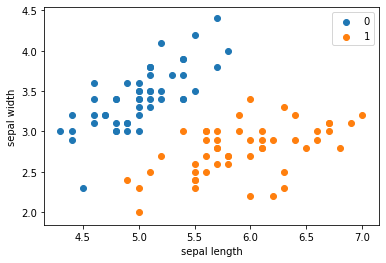

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100,[0,1,-1]]) # 取第一列和第二列特征值以及最后一列标签
data[:5]

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ]])

In [7]:
X,y = data[:,:-1],data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [8]:
# KNN算法
class KNN():
    def __init__(self,X_train=None,y_train=None,n_neighbors=3,p=2):
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def minkowski_distance(self,x,y,p=2):
        return np.linalg.norm(x-y,ord=p,axis=1)
        
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X):
        y_pred = np.zeros((X.shape[0],1),dtype=self.y_train.dtype)
        for i,x in enumerate(X):
            
            # 计算测试数据与各个训练数据之间的距离
            distances = self.minkowski_distance(self.X_train,x)
            
            # 按照距离的递增关系进行排序
            n_index = np.argsort(distances)
            
            # 选取最近的k个点，保存对应的分别类别
            n_k =self.y_train[n_index[:self.n]].ravel()
            
            # 统计类别中出现频率最高的那个，并且赋值给y_pred[i]
            # n_bincount 统计非负整数值出现的次数
            
            n_k = n_k.astype("int64")
            y_pred[i] = np.argmax(np.bincount(n_k))
        y_pred = y_pred.astype("int64")  
        return y_pred.flatten()
    
    def score(self,X_test,y_test):
        y_pred = self.predict(X_test)
        
        return np.sum(y_test == y_pred)/ y_test.size

In [9]:
clf = KNN()

In [10]:
clf.fit(X_train,y_train)

In [11]:
clf.predict(X_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [12]:
clf.score(X_test,y_test)

1.0

# Sklearn 实现

In [13]:
from sklearn.neighbors import KNeighborsClassifier

"""
n_neighbors: 临近点个数
p: 距离度量
algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
weights: 确定近邻的权重
"""


kc = KNeighborsClassifier()
kc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = kc.predict(X_test)
y_pred

array([0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1.])

In [15]:
kc.score(X_test,y_test)

1.0

# 构造平衡kd树

输入：$k$维空间数据集$T＝\{x_1，x_2,…,x_N\}$，

其中$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(k)}\right)^{\mathrm{T}}$ ，$i＝1,2,…,N$；

输出：**kd**树。

（1）开始：构造根结点，根结点对应于包含$T$的$k$维空间的超矩形区域。

选择$x^{(1)}$为坐标轴，以T中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域， 右子结点对应于坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在根结点。

（2）重复：对深度为$j$的结点，选择$x^{(1)}$为切分的坐标轴，$l＝j(modk)+1$，以该结点的区域中所有实例的$x^{(1)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在该结点。

（3）直到两个子区域没有实例存在时停止。从而形成**kd**树的区域划分。

In [16]:
from collections import namedtuple
import numpy as np

class KdNode():
    def __init__(self,point,split,left,right):
        """
        point：k维空间中的一个样本点
        split：进行分割维度的序号
        left： 该节点分割超平面左子空间构成的kd-tree
        right：该节点分割超平面右子空间构成的kd-tree
        """
        self.point = point
        self.split = split
        self.left = left
        self.right = right

class KdTree():
    def __init__(self,data):
        # 数组
        self.data = data
        # 数组大小
        self.k = len(self.data[0])
        # 根节点
        self.root = self.create_tree(0,self.data)
        # 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
        self.result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")

        
    # 按照x(1)坐标的中位数为切分点
    def create_tree(self,split,data):
        # 数据集为空
        if not data:
            return None
        
        # 按要进行分割的那一维数据排序
        data.sort(key=lambda x: x[split])
        
        # 所有实例的x坐标的中位数为切分点
        split_position = len(data) // 2
        median = data[split_position] # 分割点
        
        split_next = (split + 1) % self.k
        
        return KdNode(median,split,
                     self.create_tree(split_next,data[:split_position]),   # 左子树
                     self.create_tree(split_next,data[split_position+1:])) # 右子树


    # KDTree的前序遍历
    def preorder(self,root):
        print(root.point)
        if root.left:  # 节点不为空
            self.preorder(root.left)
        if root.right:
            self.preorder(root.right)
            
            
    def find_nearest_point(self,tree,point):
        # 数据维度
        k_point = len(point)
        
        def travel(kd_node,target,max_dist):
            
            if not kd_node:
                return self.result([0]*k_point,np.inf,0)
            
            nodes_visited = 1
            
            s = kd_node.split     # 进行分割的维度
            
            pivot = kd_node.point # 进行分割的轴
            
            if target[s] <= pivot[s]:         # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
                nearer_node  = kd_node.left   # 下一个访问节点为左子树根节点
                further_node = kd_node.right  # 同时记录右子树
            else:                            # 目标离右子树更近
                nearer_node  = kd_node.right # 下一个访问节点为右子树根节点
                further_node = kd_node.left
            
            temp = travel(nearer_node,target,max_dist) # 进行遍历找到包含目标点的区域
            
            nearest = temp.nearest_point     # 以此叶节点作为“当前最近点”
            dist = temp.nearest_dist         # 更新最近距离
            
            nodes_visited += temp.nodes_visited
            
            
#             最近点将在以目标点为球心，max_dist为半径的超球体内
            max_dist = dist if dist < max_dist else max_dist
            
            temp_dist = np.abs(pivot[s] - target[s])          # 第s维上目标点与分割超平面的距离
            
            if max_dist < temp_dist:                          # 判断超球体是否与超平面相交
                return self.result(nearest,dist,nodes_visited)# 不相交则可以直接返回，不用继续判断
            
            # 计算目标点与分割点的欧式距离
            temp_dist = np.linalg.norm(np.array(pivot)-np.array(target),ord=2)
            
            if temp_dist < dist: # 如果“更近”
                nearest = pivot  # 更新最近点
                dist = temp_dist # 更新最近距离
                max_dist = dist  # 更新超球体半径
                
            # 检查另一个子节点对应的区域是否有更近的点
            temp2 = travel(further_node,target,max_dist)
            
            nodes_visited = nodes_visited + temp2.nodes_visited
            
            if temp2.nearest_dist < dist:     # 如果另一个子节点内存在更近距离
                nearest = temp2.nearest_point # 更新最近点
                dist    = temp2.nearest_dist  # 更新最近距离
                
            return self.result(nearest,dist,nodes_visited)
        
        return travel(tree.root,point,np.inf) # 从根节点开始递归

data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kt = KdTree(data)
kt.preorder(kt.root)
result = kt.find_nearest_point(kt, [3,4.5])
print(result)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]
Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [17]:
from time import clock
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]

# 产生n个k维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)]     

N = 400000
t0 = clock()
kd2 = KdTree(random_points(3, N))            # 构建包含四十万个3维空间样本点的kd树
ret2 = kd2.find_nearest_point(kd2, [0.1,0.5,0.8])      # 四十万个样本点中寻找离目标最近的点
t1 = clock()
print ("time: ",t1-t0, "s")
print (ret2)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


time:  2.9182125999999995 s
Result_tuple(nearest_point=[0.09647486288993956, 0.4980501186991205, 0.8039677530885377], nearest_dist=0.00565435171384352, nodes_visited=39)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


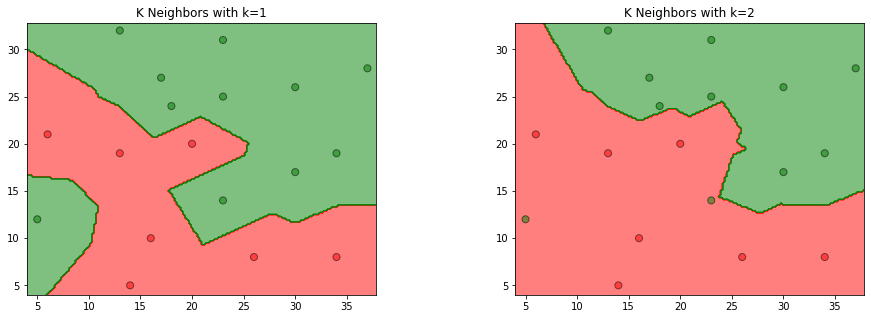

In [18]:
# 3.1

%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0],
                 [13, 32, 1], [17, 27, 1], [18, 24, 1], [20, 20,
                                                         0], [23, 14, 1],
                 [23, 25, 1], [23, 31, 1], [26, 8, 0], [30, 17, 1],
                 [30, 26, 1], [34, 8, 0], [34, 19, 1], [37, 28, 1]])
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
models = (clf.fit(X_train, y_train) for clf in models)


titles = ('K Neighbors with k=1', 'K Neighbors with k=2')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()

In [19]:
# 3.2 调用sklearn 库
import numpy as np
from sklearn.neighbors import KDTree

train_data = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
tree = KDTree(train_data, leaf_size=2)
dist, ind = tree.query(np.array([(3, 4.5)]), k=1)
x1 = train_data[ind[0]][0][0]
x2 = train_data[ind[0]][0][1]

print("x点的最近邻点是({0}, {1})".format(x1, x2))

x点的最近邻点是(2, 3)


In [20]:
# 3.3

In [21]:
from collections import namedtuple
import numpy as np

class KdNode():
    def __init__(self,point,split,left,right):
        """
        point：k维空间中的一个样本点
        split：进行分割维度的序号
        left： 该节点分割超平面左子空间构成的kd-tree
        right：该节点分割超平面右子空间构成的kd-tree
        """
        self.point = point
        self.split = split
        self.left = left
        self.right = right

class KdTree():
    def __init__(self):
        # 数组
        self.data = None
        # 数组大小
        self.k = None
        # 根节点
        self.root = None
        # 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
        self.result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")

        
    # 按照x(1)坐标的中位数为切分点
    def create_tree(self,split,data):
        # 数据集为空
        if not data:
            return None
        
        # 按要进行分割的那一维数据排序
        data.sort(key=lambda x: x[split])
        
        # 所有实例的x坐标的中位数为切分点
        split_position = len(data) // 2
        median = data[split_position] # 分割点
        split_next = (split + 1) % self.k
        return KdNode(median,split,
                     self.create_tree(split_next,data[:split_position]),   # 左子树
                     self.create_tree(split_next,data[split_position+1:])) # 右子树

    def _preorder(self,root):
        print(root.point)
        if root.left:  # 节点不为空
            self._preorder(root.left)
        if root.right:
            self._preorder(root.right)
            
        # KDTree的前序遍历
    def preorder(self):
        self._preorder(self.root)
            
    def fit(self,X):
        return self.root
            
    def find_nearest_point(self,point):
        
        tree = self
        # 数据维度
        k_point = len(point)
        
        def travel(kd_node,target,max_dist):
            
            if not kd_node:
                return self.result([0]*k_point,np.inf,0)
            
            nodes_visited = 1
            s = kd_node.split     # 进行分割的维度
            pivot = kd_node.point # 进行分割的轴
            
            if target[s] <= pivot[s]:         # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
                nearer_node  = kd_node.left   # 下一个访问节点为左子树根节点
                further_node = kd_node.right  # 同时记录右子树
            else:                            # 目标离右子树更近
                nearer_node  = kd_node.right # 下一个访问节点为右子树根节点
                further_node = kd_node.left
            
            temp = travel(nearer_node,target,max_dist) # 进行遍历找到包含目标点的区域
            nearest = temp.nearest_point     # 以此叶节点作为“当前最近点”
            dist = temp.nearest_dist         # 更新最近距离
            nodes_visited += temp.nodes_visited
            
#             最近点将在以目标点为球心，max_dist为半径的超球体内
            max_dist = dist if dist < max_dist else max_dist
            
            temp_dist = np.abs(pivot[s] - target[s])          # 第s维上目标点与分割超平面的距离
            
            if max_dist < temp_dist:                          # 判断超球体是否与超平面相交
                return self.result(nearest,dist,nodes_visited)# 不相交则可以直接返回，不用继续判断
            
            # 计算目标点与分割点的欧式距离
            temp_dist = np.linalg.norm(np.array(pivot)-np.array(target),ord=2)
            
            if temp_dist < dist: # 如果“更近”
                nearest = pivot  # 更新最近点
                dist = temp_dist # 更新最近距离
                max_dist = dist  # 更新超球体半径
                
            # 检查另一个子节点对应的区域是否有更近的点
            temp2 = travel(further_node,target,max_dist)
            nodes_visited = nodes_visited + temp2.nodes_visited
            if temp2.nearest_dist < dist:     # 如果另一个子节点内存在更近距离
                nearest = temp2.nearest_point # 更新最近点
                dist    = temp2.nearest_dist  # 更新最近距离
                
            return self.result(nearest,dist,nodes_visited)
        return travel(tree.root,point,np.inf) # 从根节点开始递归
    
    def fit(self,data):
        self.data = data
        self.k = len(self.data[0])
        self.root = self.create_tree(0,self.data)
        return self.root

data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kt = KdTree()
kt.fit(data)
kt.preorder()
result = kt.find_nearest_point([3,4.5])
print(result)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]
Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [22]:
# a = np.array([[8,1]])
# b = np.array([[9,6]])
# c = np.array([[8,4]])
# np.linalg.norm(a-c,ord=2),np.linalg.norm(b-c,ord=2)